# IMPORT MODULES

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# DATA PROCESSING

In [40]:
df = pd.read_csv("G:\\DATA_SCIENCE_PRACTICE\\BANKING\\DATASET\\Churn_Modelling.csv", delimiter=',')
df.shape

(10000, 14)

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [44]:
df = df.drop(["RowNumber", "Surname", "CustomerId"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [46]:
sizes = [df.Exited[df['Exited']==1].count() , df.Exited[df['Exited']==0].count()]
sizes

[2037, 7963]

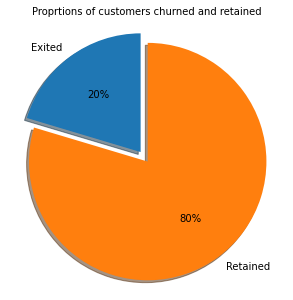

In [47]:
lables = ["Exited", "Retained"]
explode = (0 , 0.1)
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=lables, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Proprtions of customers churned and retained", size=10)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

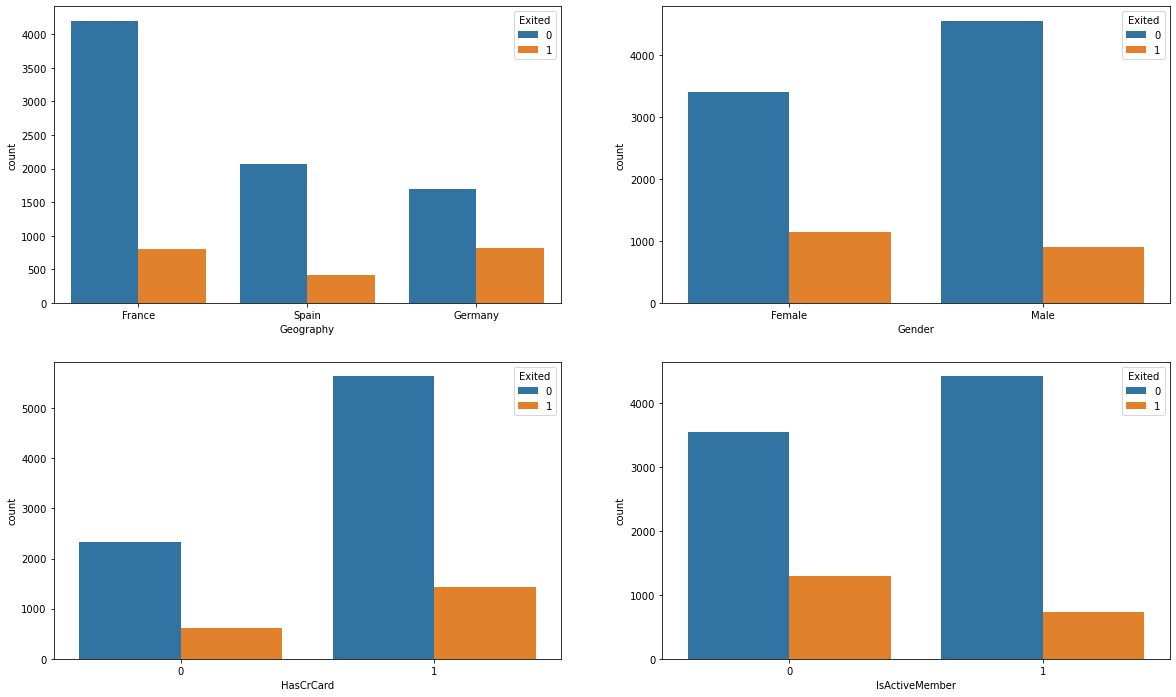

In [48]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x="Geography", hue = "Exited", data = df, ax=axarr[0][0])
sns.countplot(x="Gender", hue = "Exited", data = df, ax=axarr[0][1])
sns.countplot(x="HasCrCard", hue = "Exited", data = df, ax=axarr[1][0])
sns.countplot(x="IsActiveMember", hue = "Exited", data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

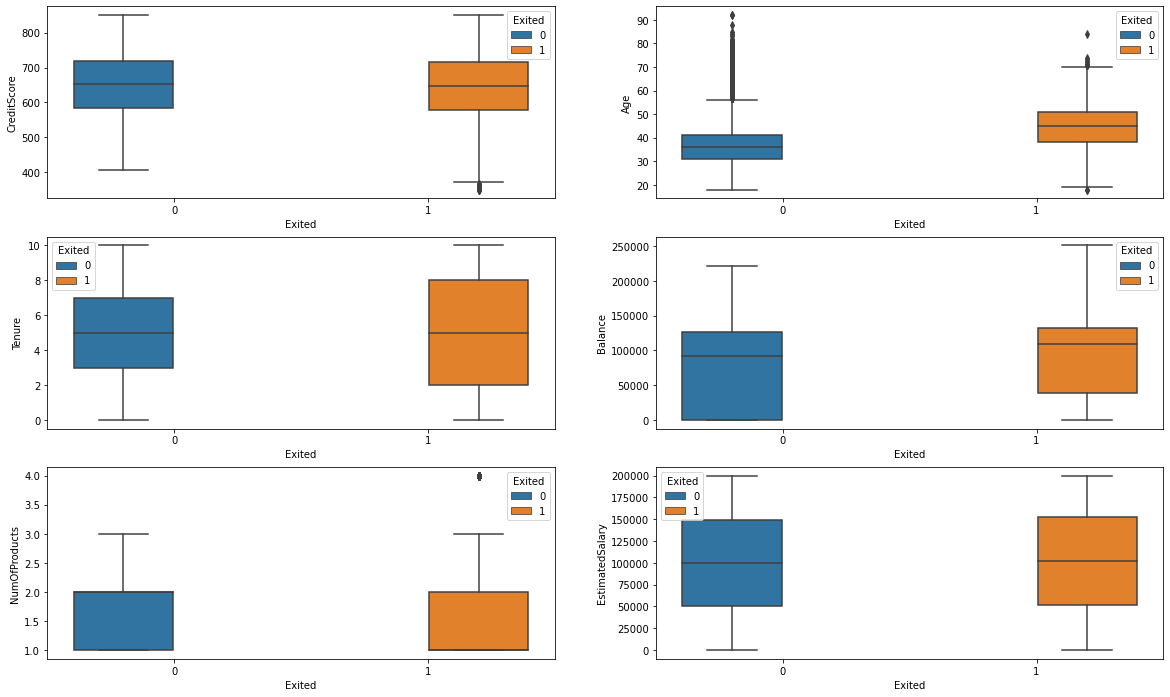

In [49]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [50]:
df_train = df.copy()
print(len(df_train))

10000


In [51]:
df_train['BalanceSalaryRatio'] = df.Balance / df.EstimatedSalary
df_train['TenureByAge'] = df.Tenure / df.Age
df_train['CreditScoreGivenAge'] = df.CreditScore/df.Age

(-1.0, 5.0)

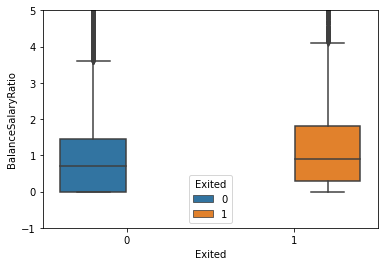

In [52]:
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df_train)
plt.ylim(-1,5)

<AxesSubplot:xlabel='Exited', ylabel='TenureByAge'>

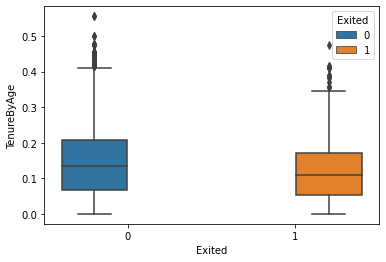

In [53]:
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)

<AxesSubplot:xlabel='Exited', ylabel='CreditScoreGivenAge'>

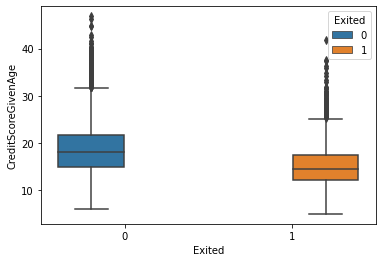

In [54]:
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df_train)

In [55]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [56]:
continuous_vars = ['CreditScore','Age','Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]

In [57]:
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [58]:
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [59]:
df_train['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [60]:
lst = ['Geography', 'Gender']
remove = []
for i in lst:
    if (df_train[i].dtype==np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j, 1, -1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)        

In [61]:
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [62]:
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()

In [63]:
df_train[continuous_vars] = (df_train[continuous_vars] - minVec) / (maxVec - minVec)

df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


# TEST TRAIN DATA SPLIT

In [64]:
X = df_train.loc[:, df_train.columns != 'Exited']
y = df_train.Exited

In [65]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

# MODEL TRAINING  

In [69]:
## PRINTING MODEL SCORES
def multiclass_roc_auc_score(y_test,y_pred):
    y_test_new = LabelBinarizer().fit_transform(y_test)
    y_pred_new = LabelBinarizer().fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

## FUNCTION FOR RUNNIG MODELS
Model, score, f1, cross, roc_auc = [], [], [], [], []

def predict_model(model):
    Model.append(str(model).split("(")[1])
    y_pred = model.predict(X_test)
    
    scoree = round(accuracy_score(y_test,y_pred)*100,2)
    score.append(scoree)
    
    f1_s = round(f1_score(y_test,y_pred,average='micro')*100,2)
    f1.append(f1_s)
  
    roc_ = multiclass_roc_auc_score(y_test,y_pred)
    roc_auc.append(roc_)
    
    print("Model:",str(model).split("(")[0])
    print("Accuracy Score:",scoree)
    print("f1 Score:",f1_s)
    print("ROC_AUC Score:",roc_)
    print("Best Score:", model.best_score_)    
    print("Best Parameters:", model.best_params_)
    print("Best Estimator:", model.best_estimator_)

## CLASSIFICATION REPORT
    class_report = classification_report(y_test,model.predict(X_test))
    print (class_report)
    
## CONFUSION MATRIX
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,square=True)

def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

Model: GridSearchCV
Accuracy Score: 80.95
f1 Score: 80.95
CV Score: 0.8166
ROC_AUC Score: 58.44
Best Score: 0.8186249999999999
Best Parameters: {'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
Best Esimators: LogisticRegression(C=100, max_iter=250, tol=1e-05)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1588
           1       0.61      0.20      0.30       412

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.60      2000
weighted avg       0.78      0.81      0.77      2000

CPU times: total: 9min 27s
Wall time: 2min 46s


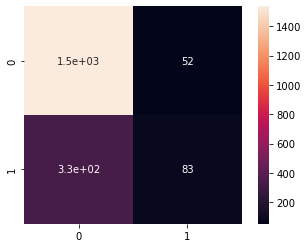

In [31]:
%%time
## LOGISTIC REGRESSION
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}

log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,y_train)
predict_model(log_primal_Grid)

Model: GridSearchCV
Accuracy Score: 85.75
f1 Score: 85.75
ROC_AUC Score: 69.82
Best Score: 0.868375
Best Parameters: {'max_depth': 8, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 50}
Best Estimator: RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5,
                       n_estimators=50)
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1588
           1       0.78      0.43      0.55       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



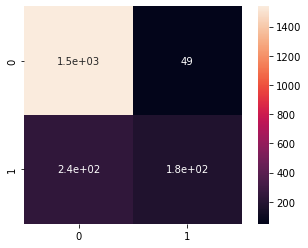

In [34]:
## RANDOM FOREST CLASSIFIER

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}

RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RFC_grid.fit(X_train,y_train)
predict_model(RFC_grid)

Model: GridSearchCV
Accuracy Score: 85.8
f1 Score: 85.8
ROC_AUC Score: 70.3
Best Score: 0.8678750000000001
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 20}
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              preci

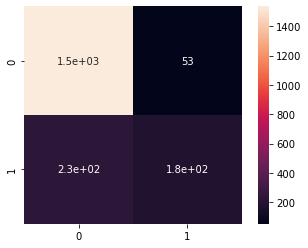

In [38]:
## EXTREME GRAADIENT BOOSTER CLASSIFEIR
param_grid = {
    'max_depth': [5,6,7,8],
    'gamma': [0.01,0.001],
    'min_child_weight':[1,5,10],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators':[5,10,20,100]}

XGB_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
XGB_grid.fit(X_train,y_train)
predict_model(XGB_grid)

Model: SVC
Accuracy Score: 84.7
f1 Score: 84.7
ROC_AUC Score: 65.83
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1588
           1       0.81      0.34      0.48       412

    accuracy                           0.85      2000
   macro avg       0.83      0.66      0.69      2000
weighted avg       0.84      0.85      0.82      2000



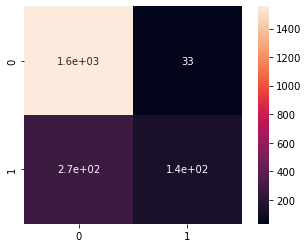

In [68]:
## SUPPORT VECTOR MACHINE WITH RBF KERNEL
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)

SVM_RBF.fit(X_train,y_train)
predict_model(SVM_RBF)

In [ ]:
## SUPPORT VECTOR MACHINE WITH POLYNOMINAL KERNEL
param_grid = {
    'C': [0.5,1,10,50,100],
    'gamma': [0.1,0.01,0.001]
    ,'probability':[True],
    'kernel': ['poly', 'rbf'],
    'degree':[2,3]
    }

SVM_POL = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0, )
SVM_POL.fit(X_train,y_train)
predict_model(SVM_POL)